In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv('/content/weatherAUS.csv')


In [ ]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97497,2011-10-21,Adelaide,15.8,21.9,8.2,1.8,0.7,NE,22.0,ESE,...,76.0,68.0,1023.8,1021.7,NaN,NaN,16.6,19.7,Yes,No
97498,2011-10-22,Adelaide,16.3,26.0,0.0,NaN,10.5,W,22.0,SW,...,74.0,48.0,1022.0,1019.2,NaN,NaN,18.7,25.4,No,No
97499,2011-10-23,Adelaide,16.7,31.8,0.0,NaN,4.4,NNW,31.0,WSW,...,69.0,47.0,1016.0,1011.6,NaN,NaN,21.9,25.9,No,No
97500,2011-10-24,Adelaide,19.0,22.5,0.2,10.0,1.7,SE,54.0,SSW,...,66.0,65.0,1008.9,1010.9,NaN,NaN,22.1,16.8,No,No


In [ ]:
data.select_dtypes(exclude="object")

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97497,15.8,21.9,8.2,1.8,0.7,22.0,7.0,9.0,76.0,68.0,1023.8,1021.7,NaN,NaN,16.6,19.7
97498,16.3,26.0,0.0,NaN,10.5,22.0,2.0,15.0,74.0,48.0,1022.0,1019.2,NaN,NaN,18.7,25.4
97499,16.7,31.8,0.0,NaN,4.4,31.0,2.0,6.0,69.0,47.0,1016.0,1011.6,NaN,NaN,21.9,25.9
97500,19.0,22.5,0.2,10.0,1.7,54.0,11.0,17.0,66.0,65.0,1008.9,1010.9,NaN,NaN,22.1,16.8


In [ ]:
from sklearn.impute import SimpleImputer

def fill_missing_values(df, strategy='mean'):
    """
    Fill missing values in a DataFrame using SimpleImputer.

    Parameters:
    - df: pandas DataFrame
    - strategy: str, optional (default='mean')
        - 'mean': Fill missing values with the mean of each column.
        - 'most_frequent': Fill missing values with the most frequent value of each column.

    Returns:
    - df_filled: pandas DataFrame
        DataFrame with missing values filled.
    """
    df_filled = df.copy()

    imputer = SimpleImputer(strategy=strategy)
    df_filled.iloc[:, :] = imputer.fit_transform(df_filled)

    return df_filled

In [ ]:
data1 = fill_missing_values(data.select_dtypes(exclude="object"))

In [ ]:
data1


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.400000,22.900000,0.600000,5.226443,7.322291,44.000000,20.000000,24.000000,71.000000,22.000000,1007.700000,1007.100000,8.000000,4.682638,16.900000,21.800000
1,7.400000,25.100000,0.000000,5.226443,7.322291,44.000000,4.000000,22.000000,44.000000,25.000000,1010.600000,1007.800000,4.647414,4.682638,17.200000,24.300000
2,12.900000,25.700000,0.000000,5.226443,7.322291,46.000000,19.000000,26.000000,38.000000,30.000000,1007.600000,1008.700000,4.647414,2.000000,21.000000,23.200000
3,9.200000,28.000000,0.000000,5.226443,7.322291,24.000000,11.000000,9.000000,45.000000,16.000000,1017.600000,1012.800000,4.647414,4.682638,18.100000,26.500000
4,17.500000,32.300000,1.000000,5.226443,7.322291,41.000000,7.000000,20.000000,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97497,15.800000,21.900000,8.200000,1.800000,0.700000,22.000000,7.000000,9.000000,76.000000,68.000000,1023.800000,1021.700000,4.647414,4.682638,16.600000,19.700000
97498,16.300000,26.000000,0.000000,5.226443,10.500000,22.000000,2.000000,15.000000,74.000000,48.000000,1022.000000,1019.200000,4.647414,4.682638,18.700000,25.400000
97499,16.700000,31.800000,0.000000,5.226443,4.400000,31.000000,2.000000,6.000000,69.000000,47.000000,1016.000000,1011.600000,4.647414,4.682638,21.900000,25.900000
97500,19.000000,22.500000,0.200000,10.000000,1.700000,54.000000,11.000000,17.000000,66.000000,65.000000,1008.900000,1010.900000,4.647414,4.682638,22.100000,16.800000


In [ ]:
from sklearn.impute import SimpleImputer

def fill_missing_values1(df, strategy='most_frequent'):
    """
    Fill missing values in a DataFrame using SimpleImputer.

    Parameters:
    - df: pandas DataFrame
    - strategy: str, optional (default='most_frequent')
        - 'mean': Fill missing values with the mean of each column.
        - 'most_frequent': Fill missing values with the most frequent value of each column.

    Returns:
    - df_filled: pandas DataFrame
        DataFrame with missing values filled.
    """
    df_filled = df.copy()

    imputer = SimpleImputer(strategy=strategy)
    df_filled.iloc[:, :] = imputer.fit_transform(df_filled)

    return df_filled

# Example usage:
# Assuming your_dataframe is your DataFrame with missing values
# df_filled_most_frequent = fill_missing_values(your_dataframe)


In [ ]:
a=data.drop(['Date'], axis =1)

In [ ]:
data2 = fill_missing_values1(a.select_dtypes(include="object"))

In [ ]:
data2

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
97497,Adelaide,NE,ESE,NE,Yes,No
97498,Adelaide,W,SW,WSW,No,No
97499,Adelaide,NNW,WSW,S,No,No
97500,Adelaide,SE,SSW,SE,No,No


In [ ]:
data1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.400000,22.900000,0.600000,5.226443,7.322291,44.000000,20.000000,24.000000,71.000000,22.000000,1007.700000,1007.100000,8.000000,4.682638,16.900000,21.800000
1,7.400000,25.100000,0.000000,5.226443,7.322291,44.000000,4.000000,22.000000,44.000000,25.000000,1010.600000,1007.800000,4.647414,4.682638,17.200000,24.300000
2,12.900000,25.700000,0.000000,5.226443,7.322291,46.000000,19.000000,26.000000,38.000000,30.000000,1007.600000,1008.700000,4.647414,2.000000,21.000000,23.200000
3,9.200000,28.000000,0.000000,5.226443,7.322291,24.000000,11.000000,9.000000,45.000000,16.000000,1017.600000,1012.800000,4.647414,4.682638,18.100000,26.500000
4,17.500000,32.300000,1.000000,5.226443,7.322291,41.000000,7.000000,20.000000,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97497,15.800000,21.900000,8.200000,1.800000,0.700000,22.000000,7.000000,9.000000,76.000000,68.000000,1023.800000,1021.700000,4.647414,4.682638,16.600000,19.700000
97498,16.300000,26.000000,0.000000,5.226443,10.500000,22.000000,2.000000,15.000000,74.000000,48.000000,1022.000000,1019.200000,4.647414,4.682638,18.700000,25.400000
97499,16.700000,31.800000,0.000000,5.226443,4.400000,31.000000,2.000000,6.000000,69.000000,47.000000,1016.000000,1011.600000,4.647414,4.682638,21.900000,25.900000
97500,19.000000,22.500000,0.200000,10.000000,1.700000,54.000000,11.000000,17.000000,66.000000,65.000000,1008.900000,1010.900000,4.647414,4.682638,22.100000,16.800000


In [ ]:
data = pd.concat([data1, data2], axis=1)


In [ ]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.400000,22.900000,0.600000,5.226443,7.322291,44.000000,20.000000,24.000000,71.000000,22.000000,...,8.000000,4.682638,16.900000,21.800000,Albury,W,W,WNW,No,No
1,7.400000,25.100000,0.000000,5.226443,7.322291,44.000000,4.000000,22.000000,44.000000,25.000000,...,4.647414,4.682638,17.200000,24.300000,Albury,WNW,NNW,WSW,No,No
2,12.900000,25.700000,0.000000,5.226443,7.322291,46.000000,19.000000,26.000000,38.000000,30.000000,...,4.647414,2.000000,21.000000,23.200000,Albury,WSW,W,WSW,No,No
3,9.200000,28.000000,0.000000,5.226443,7.322291,24.000000,11.000000,9.000000,45.000000,16.000000,...,4.647414,4.682638,18.100000,26.500000,Albury,NE,SE,E,No,No
4,17.500000,32.300000,1.000000,5.226443,7.322291,41.000000,7.000000,20.000000,82.000000,33.000000,...,7.000000,8.000000,17.800000,29.700000,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97497,15.800000,21.900000,8.200000,1.800000,0.700000,22.000000,7.000000,9.000000,76.000000,68.000000,...,4.647414,4.682638,16.600000,19.700000,Adelaide,NE,ESE,NE,Yes,No
97498,16.300000,26.000000,0.000000,5.226443,10.500000,22.000000,2.000000,15.000000,74.000000,48.000000,...,4.647414,4.682638,18.700000,25.400000,Adelaide,W,SW,WSW,No,No
97499,16.700000,31.800000,0.000000,5.226443,4.400000,31.000000,2.000000,6.000000,69.000000,47.000000,...,4.647414,4.682638,21.900000,25.900000,Adelaide,NNW,WSW,S,No,No
97500,19.000000,22.500000,0.200000,10.000000,1.700000,54.000000,11.000000,17.000000,66.000000,65.000000,...,4.647414,4.682638,22.100000,16.800000,Adelaide,SE,SSW,SE,No,No


In [ ]:
top_10_labels = [y for y in data.Location.value_counts().sort_values(ascending=False).head(10).index]
top_10_labels

['Canberra',
 'Sydney',
 'Brisbane',
 'Melbourne',
 'Cairns',
 'Ballarat',
 'Bendigo',
 'MountGinini',
 'GoldCoast',
 'Townsville']

In [ ]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode

    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [ ]:
one_hot_encoding_top_x(data, 'Location', top_10_labels)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Canberra,Location_Sydney,Location_Brisbane,Location_Melbourne,Location_Cairns,Location_Ballarat,Location_Bendigo,Location_MountGinini,Location_GoldCoast,Location_Townsville
0,13.4,22.9,0.6,5.226443,7.322291,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,5.226443,7.322291,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,5.226443,7.322291,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,5.226443,7.322291,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.226443,7.322291,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.drop(['Location'], axis =1, inplace = True)

In [ ]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Canberra,Location_Sydney,Location_Brisbane,Location_Melbourne,Location_Cairns,Location_Ballarat,Location_Bendigo,Location_MountGinini,Location_GoldCoast,Location_Townsville
0,13.400000,22.900000,0.600000,5.226443,7.322291,44.000000,20.000000,24.000000,71.000000,22.000000,...,0,0,0,0,0,0,0,0,0,0
1,7.400000,25.100000,0.000000,5.226443,7.322291,44.000000,4.000000,22.000000,44.000000,25.000000,...,0,0,0,0,0,0,0,0,0,0
2,12.900000,25.700000,0.000000,5.226443,7.322291,46.000000,19.000000,26.000000,38.000000,30.000000,...,0,0,0,0,0,0,0,0,0,0
3,9.200000,28.000000,0.000000,5.226443,7.322291,24.000000,11.000000,9.000000,45.000000,16.000000,...,0,0,0,0,0,0,0,0,0,0
4,17.500000,32.300000,1.000000,5.226443,7.322291,41.000000,7.000000,20.000000,82.000000,33.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97497,15.800000,21.900000,8.200000,1.800000,0.700000,22.000000,7.000000,9.000000,76.000000,68.000000,...,0,0,0,0,0,0,0,0,0,0
97498,16.300000,26.000000,0.000000,5.226443,10.500000,22.000000,2.000000,15.000000,74.000000,48.000000,...,0,0,0,0,0,0,0,0,0,0
97499,16.700000,31.800000,0.000000,5.226443,4.400000,31.000000,2.000000,6.000000,69.000000,47.000000,...,0,0,0,0,0,0,0,0,0,0
97500,19.000000,22.500000,0.200000,10.000000,1.700000,54.000000,11.000000,17.000000,66.000000,65.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3-q1
print(iqr)

MinTemp                  9.500000
MaxTemp                  9.600000
Rainfall                 1.200000
Evaporation              1.226443
Sunshine                 0.577709
WindGustSpeed           15.000000
WindSpeed9am            12.000000
WindSpeed3pm            11.000000
Humidity9am             24.000000
Humidity3pm             27.000000
Pressure9am              8.000000
Pressure3pm              8.000000
Cloud9am                 3.000000
Cloud3pm                 2.000000
Temp9am                  9.200000
Temp3pm                  9.100000
Location_Canberra        0.000000
Location_Sydney          0.000000
Location_Brisbane        0.000000
Location_Melbourne       0.000000
Location_Cairns          0.000000
Location_Ballarat        0.000000
Location_Bendigo         0.000000
Location_MountGinini     0.000000
Location_GoldCoast       0.000000
Location_Townsville      0.000000
dtype: float64


<ipython-input-21-61ff72929ffd>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-21-61ff72929ffd>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)


In [ ]:
data


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Canberra,Location_Sydney,Location_Brisbane,Location_Melbourne,Location_Cairns,Location_Ballarat,Location_Bendigo,Location_MountGinini,Location_GoldCoast,Location_Townsville
0,13.400000,22.900000,0.600000,5.226443,7.322291,44.000000,20.000000,24.000000,71.000000,22.000000,...,0,0,0,0,0,0,0,0,0,0
1,7.400000,25.100000,0.000000,5.226443,7.322291,44.000000,4.000000,22.000000,44.000000,25.000000,...,0,0,0,0,0,0,0,0,0,0
2,12.900000,25.700000,0.000000,5.226443,7.322291,46.000000,19.000000,26.000000,38.000000,30.000000,...,0,0,0,0,0,0,0,0,0,0
3,9.200000,28.000000,0.000000,5.226443,7.322291,24.000000,11.000000,9.000000,45.000000,16.000000,...,0,0,0,0,0,0,0,0,0,0
4,17.500000,32.300000,1.000000,5.226443,7.322291,41.000000,7.000000,20.000000,82.000000,33.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97497,15.800000,21.900000,8.200000,1.800000,0.700000,22.000000,7.000000,9.000000,76.000000,68.000000,...,0,0,0,0,0,0,0,0,0,0
97498,16.300000,26.000000,0.000000,5.226443,10.500000,22.000000,2.000000,15.000000,74.000000,48.000000,...,0,0,0,0,0,0,0,0,0,0
97499,16.700000,31.800000,0.000000,5.226443,4.400000,31.000000,2.000000,6.000000,69.000000,47.000000,...,0,0,0,0,0,0,0,0,0,0
97500,19.000000,22.500000,0.200000,10.000000,1.700000,54.000000,11.000000,17.000000,66.000000,65.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import numpy as np

def remove_outliers(df, threshold=3):
    """
    Remove outliers from numerical columns in a DataFrame using Z-score.

    Parameters:
    - df: pandas DataFrame
        The input DataFrame with numerical columns.
    - threshold: float, optional (default=3)
        The Z-score threshold beyond which data points are considered outliers.

    Returns:
    - df_no_outliers: pandas DataFrame
        DataFrame with outliers removed.
    """
    df_no_outliers = df.copy()

    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]

    return df_no_outliers

# Example usage:
# Assuming df is your DataFrame
df_no_outliers = remove_outliers(data)


<ipython-input-24-933a4d690795>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]
<ipython-input-24-933a4d690795>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]
<ipython-input-24-933a4d690795>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]
<ipython-input-24-933a4d690795>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]
<ipython-input-24-933a4d690795>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnul

In [ ]:
df_no_outliers

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Canberra,Location_Sydney,Location_Brisbane,Location_Melbourne,Location_Cairns,Location_Ballarat,Location_Bendigo,Location_MountGinini,Location_GoldCoast,Location_Townsville
0,13.4,22.9,0.6,5.226443,7.322291,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,5.226443,7.322291,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,5.226443,7.322291,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,5.226443,7.322291,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.226443,7.322291,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97496,22.1,25.3,0.0,7.800000,1.200000,48.0,9.0,13.0,43.0,70.0,...,0,0,0,0,0,0,0,0,0,0
97497,15.8,21.9,8.2,1.800000,0.700000,22.0,7.0,9.0,76.0,68.0,...,0,0,0,0,0,0,0,0,0,0
97498,16.3,26.0,0.0,5.226443,10.500000,22.0,2.0,15.0,74.0,48.0,...,0,0,0,0,0,0,0,0,0,0
97499,16.7,31.8,0.0,5.226443,4.400000,31.0,2.0,6.0,69.0,47.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_no_outliers.drop(['RainTomorrow'], axis =1)
y = df_no_outliers.RainTomorrow

In [ ]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Canberra,Location_Sydney,Location_Brisbane,Location_Melbourne,Location_Cairns,Location_Ballarat,Location_Bendigo,Location_MountGinini,Location_GoldCoast,Location_Townsville
0,13.4,22.9,0.6,5.226443,7.322291,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,5.226443,7.322291,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,5.226443,7.322291,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,5.226443,7.322291,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.226443,7.322291,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97496,22.1,25.3,0.0,7.800000,1.200000,48.0,9.0,13.0,43.0,70.0,...,0,0,0,0,0,0,0,0,0,0
97497,15.8,21.9,8.2,1.800000,0.700000,22.0,7.0,9.0,76.0,68.0,...,0,0,0,0,0,0,0,0,0,0
97498,16.3,26.0,0.0,5.226443,10.500000,22.0,2.0,15.0,74.0,48.0,...,0,0,0,0,0,0,0,0,0,0
97499,16.7,31.8,0.0,5.226443,4.400000,31.0,2.0,6.0,69.0,47.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.value_counts()

No     49109
Yes    13104
Name: RainTomorrow, dtype: int64

In [ ]:
data = remove_outliers(data)


<ipython-input-64-a25ba069a90d>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]
<ipython-input-64-a25ba069a90d>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]
<ipython-input-64-a25ba069a90d>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]
<ipython-input-64-a25ba069a90d>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnull(df_no_outliers[col]))]
<ipython-input-64-a25ba069a90d>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(z_scores < threshold) | (pd.isnul

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV



rfc = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rfc, step =1, cv =5, scoring = 'accuracy')

rfecv.fit(X, y)

ValueError: could not convert string to float: 'W'

In [ ]:
print(np.where(rfecv.support_ == False)[0])


In [ ]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis =1 ,inplace=True)


In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X.select_dtypes(exclude = "object"))

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:
constant_columns = [column for column in X.select_dtypes(exclude = "object").columns
                    if column not in X.select_dtypes(exclude = "object").columns[var_thres.get_support()]]

print(len(constant_columns))

10


In [ ]:
X.drop(constant_columns, axis=1, inplace = True
       )

In [ ]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,13.4,22.9,0.6,5.226443,7.322291,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.682638,16.9,21.8,W,W,WNW,No
1,7.4,25.1,0.0,5.226443,7.322291,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.647414,4.682638,17.2,24.3,WNW,NNW,WSW,No
2,12.9,25.7,0.0,5.226443,7.322291,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.647414,2.000000,21.0,23.2,WSW,W,WSW,No
3,9.2,28.0,0.0,5.226443,7.322291,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.647414,4.682638,18.1,26.5,NE,SE,E,No
4,17.5,32.3,1.0,5.226443,7.322291,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,W,ENE,NW,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97496,22.1,25.3,0.0,7.800000,1.200000,48.0,9.0,13.0,43.0,70.0,1018.9,1021.0,4.647414,4.682638,24.4,19.7,WNW,N,SSW,No
97497,15.8,21.9,8.2,1.800000,0.700000,22.0,7.0,9.0,76.0,68.0,1023.8,1021.7,4.647414,4.682638,16.6,19.7,NE,ESE,NE,Yes
97498,16.3,26.0,0.0,5.226443,10.500000,22.0,2.0,15.0,74.0,48.0,1022.0,1019.2,4.647414,4.682638,18.7,25.4,W,SW,WSW,No
97499,16.7,31.8,0.0,5.226443,4.400000,31.0,2.0,6.0,69.0,47.0,1016.0,1011.6,4.647414,4.682638,21.9,25.9,NNW,WSW,S,No


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [ ]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

<ipython-input-35-d946359cc912>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


3

In [ ]:
X.drop(corr_features,axis=1, inplace = True)


In [ ]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,13.4,22.9,0.6,5.226443,7.322291,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,4.682638,W,W,WNW,No
1,7.4,25.1,0.0,5.226443,7.322291,44.0,4.0,22.0,44.0,25.0,1010.6,4.647414,4.682638,WNW,NNW,WSW,No
2,12.9,25.7,0.0,5.226443,7.322291,46.0,19.0,26.0,38.0,30.0,1007.6,4.647414,2.000000,WSW,W,WSW,No
3,9.2,28.0,0.0,5.226443,7.322291,24.0,11.0,9.0,45.0,16.0,1017.6,4.647414,4.682638,NE,SE,E,No
4,17.5,32.3,1.0,5.226443,7.322291,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,W,ENE,NW,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97496,22.1,25.3,0.0,7.800000,1.200000,48.0,9.0,13.0,43.0,70.0,1018.9,4.647414,4.682638,WNW,N,SSW,No
97497,15.8,21.9,8.2,1.800000,0.700000,22.0,7.0,9.0,76.0,68.0,1023.8,4.647414,4.682638,NE,ESE,NE,Yes
97498,16.3,26.0,0.0,5.226443,10.500000,22.0,2.0,15.0,74.0,48.0,1022.0,4.647414,4.682638,W,SW,WSW,No
97499,16.7,31.8,0.0,5.226443,4.400000,31.0,2.0,6.0,69.0,47.0,1016.0,4.647414,4.682638,NNW,WSW,S,No


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state = 20)


In [ ]:
num_features = X_train1.select_dtypes(exclude = "object")
cat_features = X_train1.select_dtypes(include = "object")

In [ ]:
num_features

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,20.000000,25.800000,0.000000,5.226443,7.322291,30.000000,19.000000,19.000000,68.000000,65.000000,...,0,0,0,1,0,0,0,0,0,0
1,15.200000,22.300000,0.000000,5.226443,7.322291,39.672748,19.000000,18.720298,47.000000,53.644761,...,0,0,1,0,0,0,0,0,0,0
2,11.600000,24.900000,0.000000,2.000000,10.200000,24.000000,11.000000,17.000000,63.000000,61.000000,...,0,0,0,0,0,0,0,0,0,0
3,17.800000,23.400000,24.000000,5.226443,7.322291,57.000000,31.000000,28.000000,98.000000,88.000000,...,0,0,0,0,0,0,0,0,0,1
4,17.200000,23.800000,14.400000,2.400000,2.800000,24.000000,13.000000,7.000000,91.000000,71.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73673,11.309561,17.491916,1.491178,5.226443,7.322291,33.000000,4.453427,18.818629,90.453427,82.272056,...,0,0,0,0,0,0,0,0,0,0
73674,21.706678,24.859679,1.264582,4.695898,5.342740,39.512257,18.256128,24.743872,87.743872,77.628064,...,0,0,0,0,0,0,0,0,0,0
73675,17.312146,22.201584,0.000000,7.984158,5.279405,51.989439,34.978877,24.021123,70.005281,80.989439,...,0,0,0,0,0,0,0,0,0,0
73676,4.704659,11.477260,18.982474,1.504659,6.203952,76.317804,31.931503,39.909595,72.931503,65.386301,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
cat_features

""
0
1
2
3
4
...
73673
73674
73675
73676


In [ ]:
one_hot_encoding_top_x(x_test, 'Location', top_10_labels)
x_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Canberra,Location_Sydney,Location_Darwin,Location_Melbourne,Location_Brisbane,Location_Adelaide,Location_Perth,Location_Hobart,Location_Launceston,Location_Wollongong
2245,12.7,24.0,0.2,5.468232,7.611178,30.00000,6.0,9.000000,83.0,53.000000,...,0,0,0,0,0,0,0,0,0,0
56191,16.4,32.3,3.8,5.468232,7.611178,61.00000,31.0,20.000000,63.0,38.000000,...,0,0,0,0,0,0,0,0,0,0
8766,8.0,22.0,0.0,3.000000,7.611178,31.00000,17.0,13.000000,66.0,46.000000,...,0,0,0,0,0,0,0,0,0,0
144455,8.1,28.2,0.0,5.468232,7.611178,39.00000,20.0,15.000000,54.0,21.000000,...,0,0,0,0,0,0,0,0,0,0
28798,14.4,23.3,20.0,0.800000,7.611178,48.00000,19.0,30.000000,66.0,39.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57977,9.3,30.8,0.0,5.468232,7.611178,30.00000,17.0,4.000000,61.0,14.000000,...,0,0,0,0,0,0,0,0,0,0
15653,4.6,17.2,0.0,5.468232,7.611178,40.03523,4.0,0.000000,66.0,40.000000,...,0,0,0,0,0,0,0,0,0,0
17589,14.6,23.7,20.2,5.468232,7.611178,40.03523,28.0,18.662657,61.0,51.539116,...,0,0,0,0,0,0,0,0,0,0
39420,15.0,32.7,0.0,8.600000,7.611178,44.00000,11.0,11.000000,50.0,25.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    SGDClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import (
    KNeighborsClassifier,
    RadiusNeighborsClassifier,
    NearestCentroid,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library
from sklearn.neural_network import MLPClassifier



step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(),X_train1.columns )
    ],
    remainder='passthrough'
)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_encoded, y_train)
mutual_info

array([4.47509248e-02, 5.04089480e-02, 3.17344201e-02, 1.03132873e-01,
       4.81834728e-02, 2.82826257e-04, 1.07108607e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.59909696e-03, 1.92731211e-03,
       0.00000000e+00, 2.43298087e-03, 1.56082029e-03, 1.92758667e-03,
       4.44528891e-04, 0.00000000e+00, 2.84117502e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.55025179e-03,
       4.06672821e-05, 6.73497703e-04, 0.00000000e+00, 8.66926018e-04,
       0.00000000e+00, 1.94957136e-03, 2.17093141e-04, 0.00000000e+00,
       2.01710167e-03, 0.00000000e+00, 9.09872522e-05, 1.27480895e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.13777227e-03,
       0.00000000e+00, 0.00000000e+00, 1.77447960e-03, 1.84459288e-03,
       2.21620816e-03, 4.96482280e-04, 0.00000000e+00, 7.57629695e-04,
       3.09661688e-03, 0.00000000e+00, 1.70328294e-03, 1.61913413e-03,
       1.18026751e-03, 0.00000000e+00, 3.59312481e-04, 0.00000000e+00,
      

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_encoded.columns
mutual_info.sort_values(ascending=False)

Humidity3pm              0.103133
Sunshine                 0.050409
Cloud3pm                 0.048183
RainToday_No             0.046220
Rainfall                 0.044751
                           ...   
Location_MountGinini     0.000000
Location_WaggaWagga      0.000000
Location_MountGambier    0.000000
Location_Moree           0.000000
WindDir9am_NNE           0.000000
Length: 94, dtype: float64

<Axes: >

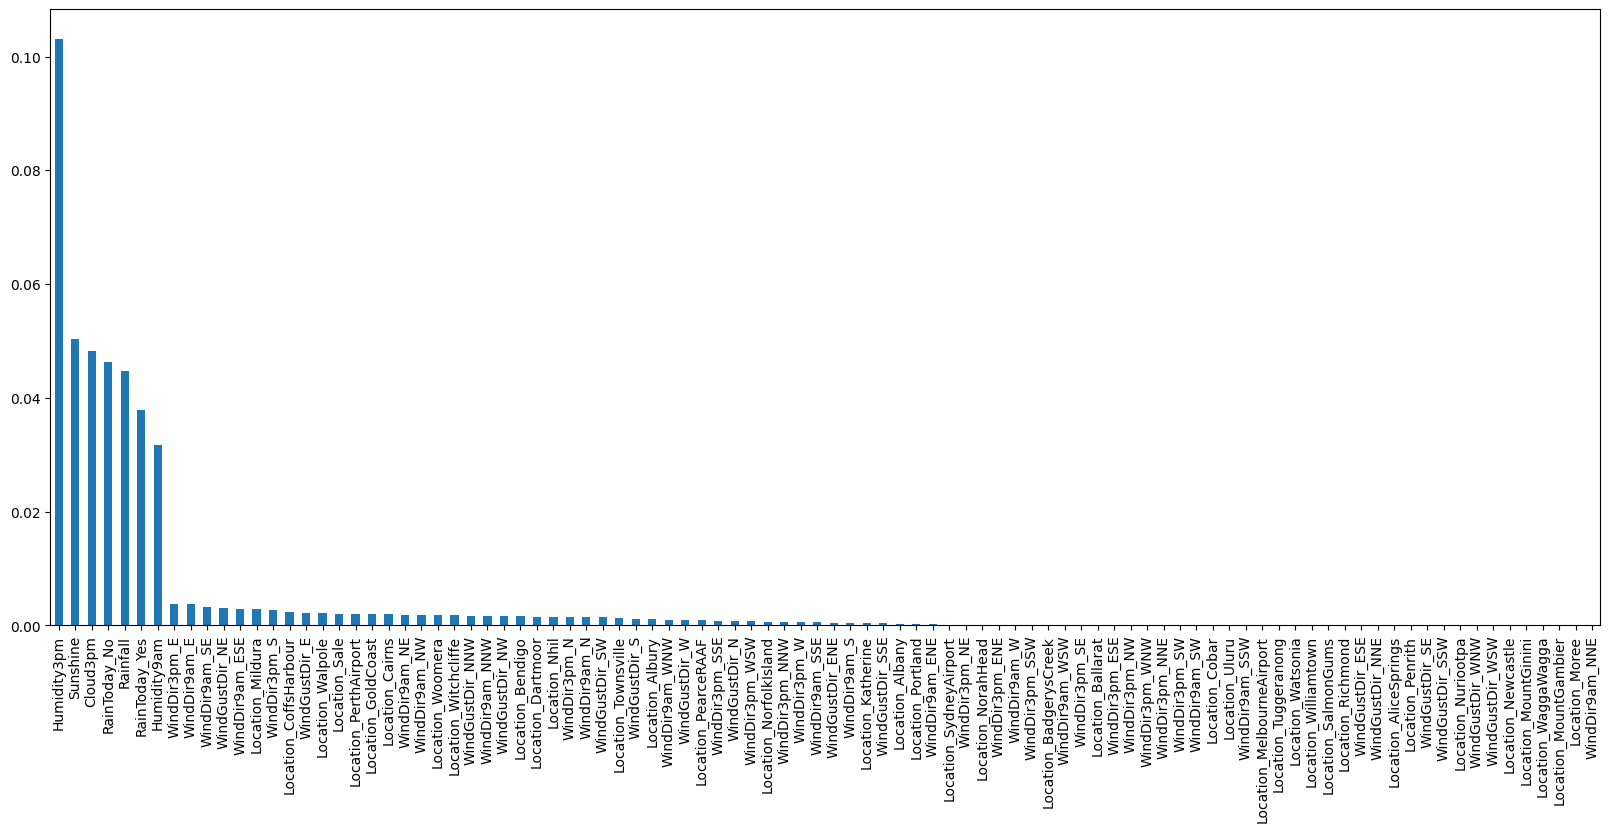

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [ ]:
from sklearn.feature_selection import SelectKBest


#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(x_train.select_dtypes(exclude="object"), y_train)

a=x_train.select_dtypes(exclude="object").columns[sel_five_cols.get_support()]
a


Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm'],
      dtype='object')

In [ ]:
cat_features.columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [ ]:
x_train = x_train[['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm']]

In [ ]:
x_train

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm
52767,8.8,1.0,5.468232,7.611178,46.00000,98.0,73.000000,1017.64994,4.447461,4.50993
10053,23.9,0.0,5.400000,11.400000,48.00000,62.0,59.000000,1024.00000,6.000000,4.00000
59700,13.0,0.0,0.800000,7.611178,28.00000,88.0,78.000000,1024.00000,8.000000,8.00000
116547,17.2,0.0,5.468232,8.800000,24.00000,88.0,47.000000,1024.20000,0.000000,1.00000
111050,21.0,0.0,11.600000,7.611178,40.03523,69.0,51.539116,1014.70000,6.000000,4.50993
...,...,...,...,...,...,...,...,...,...,...
37088,11.5,19.2,0.600000,0.700000,50.00000,84.0,82.000000,1011.10000,7.000000,7.00000
114262,13.9,9.8,5.468232,7.611178,48.00000,84.0,83.000000,1026.40000,4.447461,4.50993
25046,18.1,0.0,5.468232,7.611178,24.00000,92.0,40.000000,1017.64994,4.447461,4.50993
49159,19.5,0.0,5.468232,7.611178,37.00000,59.0,26.000000,1014.70000,4.447461,4.50993


In [ ]:
x_test

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm
2245,24.0,0.2,5.468232,7.611178,30.00000,83.0,53.000000,1014.60000,8.000000,8.00000
56191,32.3,3.8,5.468232,7.611178,61.00000,63.0,38.000000,1006.30000,6.000000,4.50993
8766,22.0,0.0,3.000000,7.611178,31.00000,66.0,46.000000,1028.60000,4.447461,7.00000
144455,28.2,0.0,5.468232,7.611178,39.00000,54.0,21.000000,1023.90000,4.447461,4.50993
28798,23.3,20.0,0.800000,7.611178,48.00000,66.0,39.000000,1000.80000,4.447461,4.50993
...,...,...,...,...,...,...,...,...,...,...
57977,30.8,0.0,5.468232,7.611178,30.00000,61.0,14.000000,1012.10000,4.447461,4.50993
15653,17.2,0.0,5.468232,7.611178,40.03523,66.0,40.000000,1017.64994,6.000000,6.00000
17589,23.7,20.2,5.468232,7.611178,40.03523,61.0,51.539116,1017.64994,6.000000,4.50993
39420,32.7,0.0,8.600000,7.611178,44.00000,50.0,25.000000,1022.50000,4.447461,1.00000


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from tqdm import tqdm
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import *

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Preprocess 'previous_year_rating' column


    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred,  average="macro")
    f1 = f1_score(y_test, y_pred,  average="macro")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm


# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'HistGradientBoosting Classifier': HistGradientBoostingClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),  # Example of using MLPClassifier from sklearn
    # Add more classifiers as needed
}
# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in tqdm(models.items()):
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

NameError: name 'AdaBoostClassifier' is not defined

+--------------------------+------------+-------------+----------+------------+--------------------+
| Model                    |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+==========================+============+=============+==========+============+====================+
| Random Forest Classifier |   0.850211 |    0.790175 | 0.700596 |    0.72973 | [[16173   797]     |
|                          |            |             |          |            |  [ 2395  1945]]    |
+--------------------------+------------+-------------+----------+------------+--------------------+

The model with the highest accuracy is: Random Forest Classifier (Accuracy: 0.8502)


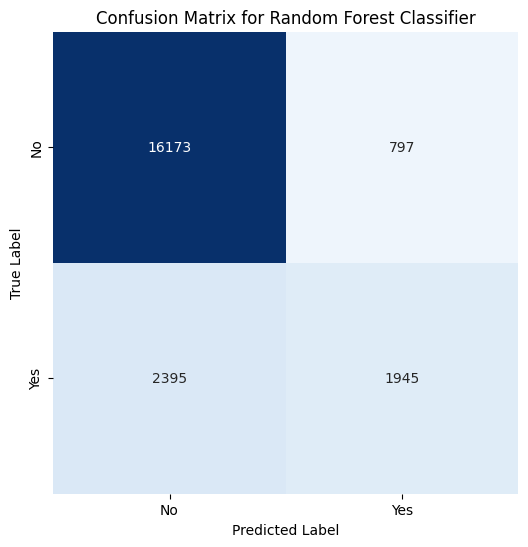

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your class labels (replace with your actual class labels)
class_labels = ['No', 'Yes']

def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    # Calculate the confusion matrix with class labels
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)

    return accuracy, precision, recall, f1, cm

# Initialize different classification models
models = {
    'Random Forest Classifier': RandomForestClassifier(),
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models|
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

# Plot confusion matrix with class labels and show labels
plt.figure(figsize=(6, 6))
sns.heatmap(results[max_accuracy_index][-1], annot=True, fmt="d", cmap="Blues", cbar=False, vmin=0, vmax=results[max_accuracy_index][-1].diagonal().max() + 10)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.show()


In [ ]:
model.get_params()

In [ ]:
y_train.value_counts()

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [10, 20, 30],
    'max_leaf_nodes': [15, 31, 50],
    'n_iter_no_change': [5, 10, 15],
}

In [ ]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Adjust the scoring metric based on your problem

)

# Perform the grid search
grid_search.fit(X_encoded, y_train)  # Replace X_train, y_train with your training data

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

KeyboardInterrupt: 

In [ ]:
X = pd.get_dummies(X, drop_first = True)
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.900000,0.6,5.468232,7.611178,44.00000,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.100000,0.0,5.468232,7.611178,44.00000,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.700000,0.0,5.468232,7.611178,46.00000,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,0
3,9.2,28.000000,0.0,5.468232,7.611178,24.00000,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.300000,1.0,5.468232,7.611178,41.00000,7.0,20.0,82.0,33.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,1,0,0
145458,7.8,27.000000,0.0,5.468232,7.611178,28.00000,13.0,7.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import cross_val_score,KFold

# Create transformers

kf=KFold(n_splits=5)

score=cross_val_score(model,X,y,cv=kf)


print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))



Cross Validation Scores are [0.84537776 0.83932426 0.84800563 0.84401689 0.85325449]
Average Cross Validation score :0.8459958071749734


In [ ]:
X = pd.get_dummies(X, drop_first = True, columns = cat_features.columns)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=25

)

In [ ]:
X_train1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
42028,20.0,25.8,0.0,5.226443,7.322291,30.000000,19.0,19.000000,68.0,65.000000,...,0,0,0,1,0,0,0,0,0,0
17902,15.2,22.3,0.0,5.226443,7.322291,39.672748,19.0,18.720298,47.0,53.644761,...,0,0,1,0,0,0,0,0,0,0
10254,11.6,24.9,0.0,2.000000,10.200000,24.000000,11.0,17.000000,63.0,61.000000,...,0,0,0,0,0,0,0,0,0,0
19144,17.8,23.4,24.0,5.226443,7.322291,57.000000,31.0,28.000000,98.0,88.000000,...,0,0,0,0,0,0,0,0,0,1
10228,17.2,23.8,14.4,2.400000,2.800000,24.000000,13.0,7.000000,91.0,71.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41098,3.2,17.6,0.0,2.400000,9.700000,30.000000,19.0,7.000000,67.0,39.000000,...,0,0,0,0,0,0,1,0,0,0
28195,13.9,19.8,6.8,0.000000,7.322291,20.000000,11.0,15.000000,99.0,99.000000,...,0,0,1,0,0,0,0,0,0,1
6861,12.1,24.1,0.0,6.200000,7.322291,44.000000,15.0,22.000000,75.0,43.000000,...,0,0,0,0,0,0,0,0,1,0
26241,16.2,24.2,0.0,5.226443,7.322291,31.000000,11.0,17.000000,52.0,42.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sm = SMOTE(random_state=27)
X_train1, y_train1 = sm.fit_resample(X_train1, y_train1)

In [ ]:
X_train1

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train1, y_train1)
mutual_info

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train1, y_train1)

a=X_train1.columns[sel_five_cols.get_support()]
a


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Cloud3pm'],
      dtype='object')

In [ ]:
X_test1 = X_test1[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Cloud3pm']]

In [ ]:
num_features = X_train1.select_dtypes(exclude = "object")
cat_features = X_train1.select_dtypes(include = "object")

In [ ]:
num_features

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm
0,20.000000,25.800000,0.000000,30.000000,19.000000,19.000000,68.000000,65.000000,1013.300000,8.000000
1,15.200000,22.300000,0.000000,39.672748,19.000000,18.720298,47.000000,53.644761,1017.966639,4.682638
2,11.600000,24.900000,0.000000,24.000000,11.000000,17.000000,63.000000,61.000000,1021.400000,1.000000
3,17.800000,23.400000,24.000000,57.000000,31.000000,28.000000,98.000000,88.000000,1007.800000,4.682638
4,17.200000,23.800000,14.400000,24.000000,13.000000,7.000000,91.000000,71.000000,1025.200000,7.000000
...,...,...,...,...,...,...,...,...,...,...
73673,11.309561,17.491916,1.491178,33.000000,4.453427,18.818629,90.453427,82.272056,1006.535290,4.983474
73674,21.706678,24.859679,1.264582,39.512257,18.256128,24.743872,87.743872,77.628064,1016.521386,7.628064
73675,17.312146,22.201584,0.000000,51.989439,34.978877,24.021123,70.005281,80.989439,1018.799472,7.000000
73676,4.704659,11.477260,18.982474,76.317804,31.931503,39.909595,72.931503,65.386301,1014.472324,7.000000


In [ ]:
cat_features

""
0
1
2
3
4
...
73673
73674
73675
73676


In [ ]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(),X_train1.columns )
    ],
    remainder='passthrough'
)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from tqdm import tqdm
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import *

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Preprocess 'previous_year_rating' column


    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train1, y_train1)
    y_pred = pipe.predict(X_test1)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test1, y_pred)
    precision = precision_score(y_test1, y_pred, average="macro")
    recall = recall_score(y_test1, y_pred,  average="macro")
    f1 = f1_score(y_test1, y_pred,  average="macro")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm


# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'HistGradientBoosting Classifier': HistGradientBoostingClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),  # Example of using MLPClassifier from sklearn
    # Add more classifiers as needed
}
# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in tqdm(models.items()):
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_train1, y_train1, X_test1, y_test1)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

100%|██████████| 15/15 [03:06<00:00, 12.40s/it]

+---------------------------------+------------+-------------+----------+------------+--------------------+
| Model                           |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+=================================+============+=============+==========+============+====================+
| Logistic Regression             |   0.84107  |    0.781924 | 0.690309 |   0.718563 | [[11672   598]     |
|                                 |            |             |          |            |  [ 1874  1410]]    |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Random Forest Classifier        |   0.848978 |    0.807726 | 0.692979 |   0.725713 | [[11816   454]     |
|                                 |            |             |          |            |  [ 1895  1389]]    |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Gradient Boosting Classifi

In [ ]:
X_train1.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assuming you have sequences as input data
# X_ann, y_ann = preprocess_data_for_ann(X, y)


# Define and compile the ANN model
model_ann = Sequential()
model_ann.add(Dense(64, activation='relu', input_shape=(X_train1.shape[1],)))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

# Train the ANN model
model_ann.fit(X_train1, y_train1, epochs=10, batch_size=32, validation_data=(X_test1, y_test1))

# Evaluate the ANN model
accuracy_ann = model_ann.evaluate(X_test1, y_test1)
print(f"\nAccuracy of the ANN model: {accuracy_ann[1]:.4f}")
